In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re

%matplotlib inline
#rcParams['figure.figsize'] = 10,8
df_train = pd.read_csv(r"c:\Users\Divyanshu\Downloads\train.csv")
df_test = pd.read_csv(r"c:\Users\Divyanshu\Downloads\test.csv")

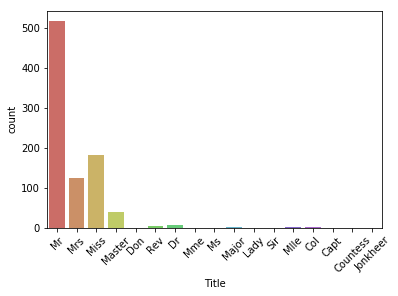

In [2]:
df_train['Title'] = df_train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#Plotting the result
sns.countplot(x='Title', data=df_train, palette="hls")
plt.xticks(rotation=45)
plt.show()

In [3]:
df_test['Title'] = df_test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))


Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }
    
# we map each title to correct category
df_train['Title'] = df_train.Title.map(Title_Dictionary)
df_test['Title'] = df_test.Title.map(Title_Dictionary)

Chances to survive based on titles: 
Title
Master     0.575000
Miss       0.701087
Mr         0.156673
Mrs        0.795276
Officer    0.277778
Royalty    0.500000
Name: Survived, dtype: float64


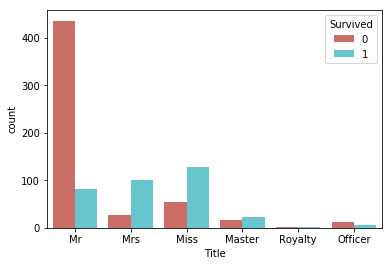

In [4]:
print("Chances to survive based on titles: ")
print(df_train.groupby("Title")["Survived"].mean())

#Plotting the results
sns.countplot(x='Title', data=df_train, palette="hls",hue="Survived")
#plt.xticks(rotation=45)
#plt.show()

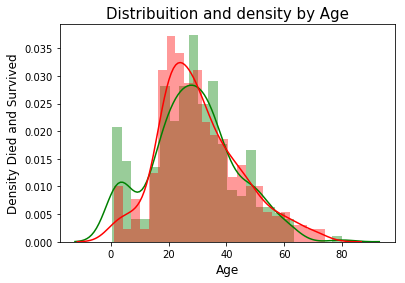

In [5]:
#First I will look my distribuition without NaN's
#I will create a df to look distribuition 
age_high_zero_died = df_train[(df_train["Age"] > 0) & 
                              (df_train["Survived"] == 0)]
age_high_zero_surv = df_train[(df_train["Age"] > 0) & 
                              (df_train["Survived"] == 1)]


sns.distplot(age_high_zero_surv["Age"], bins=24, color='g')
sns.distplot(age_high_zero_died["Age"], bins=24, color='r')
plt.title("Distribuition and density by Age",fontsize=15)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Density Died and Survived",fontsize=12)
plt.show()


In [6]:
#inputing the values on Age Na's
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')

print(df_train["Age"].isnull().sum())

0


In [7]:
interval = (0, 5, 12, 18, 25, 35, 60, 120)
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

df_train["Age_cat"] = pd.cut(df_train.Age, interval, labels=cats)

df_train["Age_cat"].head()

0    Student
1      Adult
2      Young
3      Young
4      Young
Name: Age_cat, dtype: category
Categories (7, object): [babies < Children < Teen < Student < Young < Adult < Senior]

In [8]:
#Do the same to df_test

interval = (0, 5, 12, 18, 25, 35, 60, 120)
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

df_test["Age_cat"] = pd.cut(df_test.Age, interval, labels=cats)

Survived    0   1
Age_cat          
babies     15  33
Children   16   9
Teen       54  49
Student   108  56
Young     206  99
Adult     133  91
Senior     17   5


Text(0.5,1,'Age Distribution ')

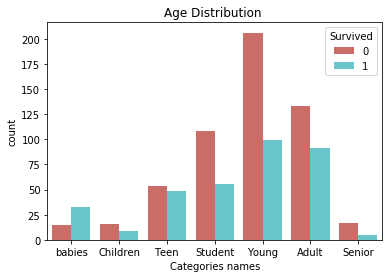

In [9]:
print(pd.crosstab(df_train.Age_cat, df_train.Survived))

#Plotting the result
sns.countplot("Age_cat",data=df_train,hue="Survived", palette="hls")
plt.xlabel("Categories names")
plt.title("Age Distribution ")

In [10]:
print(df_train['Fare'].isnull().sum())

0


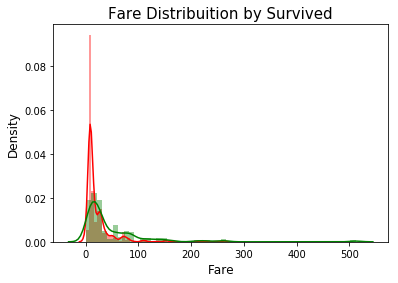

In [11]:
sns.distplot(df_train[df_train.Survived == 0]["Fare"], 
             bins=50, color='r')
sns.distplot(df_train[df_train.Survived == 1]["Fare"], 
             bins=50, color='g')
plt.title("Fare Distribuition by Survived", fontsize=15)
plt.xlabel("Fare", fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.show()

Survived    0    1
Fare_cat          
NoInf      14    1
quart_1   175   51
quart_2   155   62
quart_3   112   99
quart_4    93  129


Text(0.5,1,'Count of survived x Fare expending')

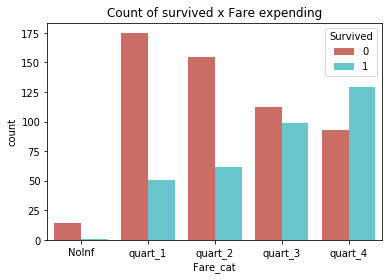

In [12]:
df_train.Fare = df_train.Fare.fillna(-0.5)

#intervals to categorize
quant = (-1, 0, 8, 15, 31, 600)

#Labels without input values
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

#doing the cut in fare and puting in a new column
df_train["Fare_cat"] = pd.cut(df_train.Fare, quant, labels=label_quants)

#Description of transformation
print(pd.crosstab(df_train.Fare_cat, df_train.Survived))

#Plotting the new feature
sns.countplot(x="Fare_cat", hue="Survived", data=df_train, palette="hls")
plt.title("Count of survived x Fare expending")

In [13]:
# Replicate the same to df_test
df_test.Fare = df_test.Fare.fillna(-0.5)

quant = (-1, 0, 8, 15, 31, 1000)
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

df_test["Fare_cat"] = pd.cut(df_test.Fare, quant, labels=label_quants)

In [14]:
del df_train["Fare"]
del df_train["Ticket"]
del df_train["Age"]
del df_train["Cabin"]
del df_train["Name"]

#same in df_test
del df_test["Fare"]
del df_test["Ticket"]
del df_test["Age"]
del df_test["Cabin"]
del df_test["Name"]

Total of Survived or not: 
Survived
0    549
1    342
Name: PassengerId, dtype: int64


Text(0.5,1,'Total Distribuition by survived or not')

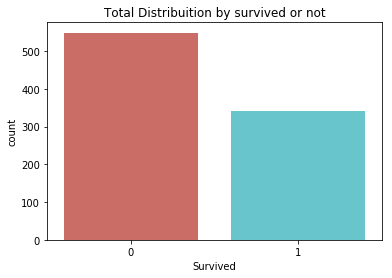

In [15]:
print("Total of Survived or not: ")
print(df_train.groupby("Survived")["PassengerId"].count())
sns.countplot(x="Survived", data=df_train,palette="hls")
plt.title('Total Distribuition by survived or not')

Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353


Text(0.5,1,'Embarked x Pclass')

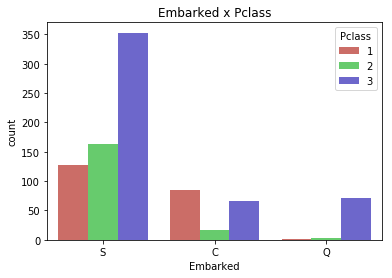

In [16]:
# Distribuition by class
print(pd.crosstab(df_train.Pclass, df_train.Embarked))
sns.countplot(x="Embarked", data=df_train, hue="Pclass",palette="hls")
plt.title('Embarked x Pclass')

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


Text(0.5,1,'Class Distribuition by survived or not')

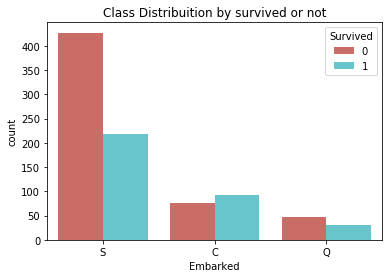

In [17]:
df_train["Embarked"] = df_train["Embarked"].fillna('S')
# Exploring Survivors vs Embarked
print(pd.crosstab(df_train.Survived, df_train.Embarked))
sns.countplot(x="Embarked", data=df_train, hue="Survived",palette="hls")
plt.title('Class Distribuition by survived or not')

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Text(0.5,1,'Class Distribuition by survived or not')

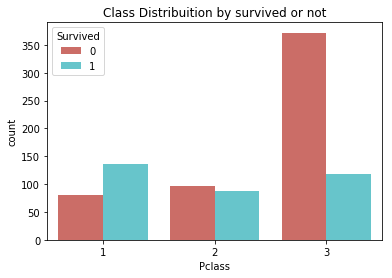

In [18]:
print(pd.crosstab(df_train.Survived, df_train.Pclass))
sns.countplot(x="Pclass", data=df_train, hue="Survived",palette="hls")
plt.title('Class Distribuition by survived or not')

In [19]:
df_train["FSize"] = df_train["Parch"] + df_train["SibSp"] + 1

df_test["FSize"] = df_test["Parch"] + df_test["SibSp"] + 1

In [20]:
del df_train["SibSp"]
del df_train["Parch"]

del df_test["SibSp"]
del df_test["Parch"]

In [21]:
df_train = pd.get_dummies(df_train, columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],\
                          prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

df_test = pd.get_dummies(df_test, columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],\
                         prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

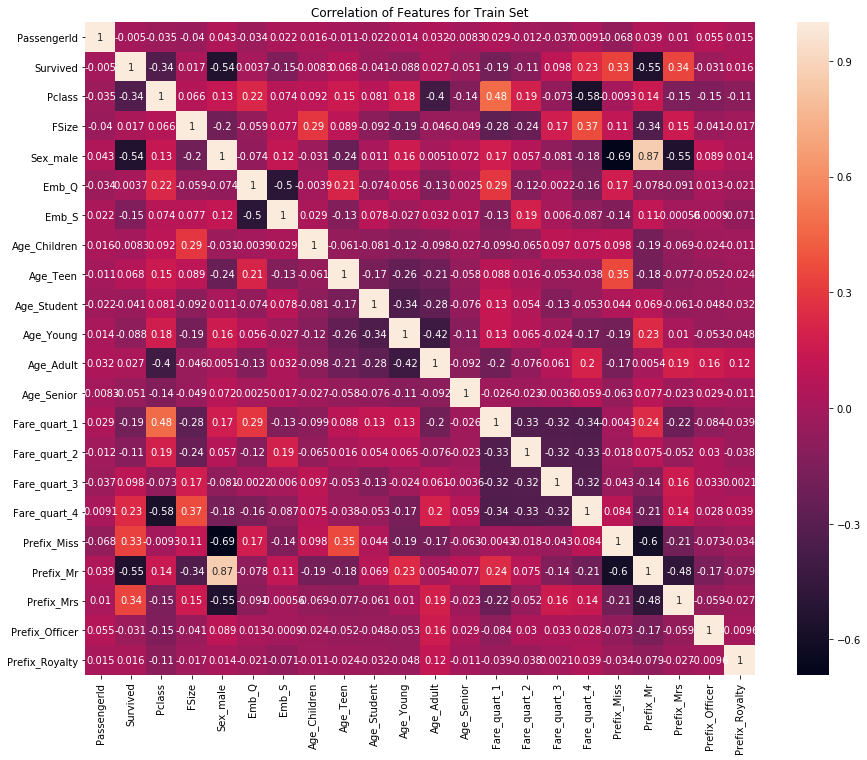

In [22]:
#Finallt, lets look the correlation of df_train
plt.figure(figsize=(15,12))
plt.title('Correlation of Features for Train Set')
sns.heatmap(df_train.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

In [23]:
train = df_train.drop(["Survived","PassengerId"],axis=1)
train_ = df_train["Survived"]

test_ = df_test.drop(["PassengerId"],axis=1)

X_train = train.values
y_train = train_.values

X_test = test_.values
X_test = X_test.astype(np.float64, copy=False)

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

C:\Users\Divyanshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from keras.optimizers import SGD
import graphviz

ModuleNotFoundError: No module named 'keras'